In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML Dataset/K-Means & Hirarchical Clustering/50_Startups.csv')

In [ ]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.describe()

,RND,ADMIN,MKT,PROFIT
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
X=df.iloc[ :,[2,4]].values
print(X)

[[471784.1  192261.83]
 [443898.53 191792.06]
 [407934.54 191050.39]
 [383199.62 182901.99]
 [366168.42 166187.94]
 [362861.36 156991.12]
 [127716.82 156122.51]
 [323876.68 155752.6 ]
 [311613.29 152211.77]
 [304981.62 149759.96]
 [229160.95 146121.95]
 [249744.55 144259.4 ]
 [249839.44 141585.52]
 [252664.93 134307.35]
 [256512.92 132602.65]
 [261776.23 129917.04]
 [264346.06 126992.93]
 [282574.31 125370.37]
 [294919.57 124266.9 ]
 [     0.   122776.86]
 [298664.47 118474.03]
 [299737.29 111313.02]
 [303319.26 110352.25]
 [304768.73 108733.99]
 [140574.81 108552.04]
 [137962.62 107404.34]
 [134050.07 105733.54]
 [353183.81 105008.31]
 [118148.2  103282.38]
 [107138.38 101004.64]
 [ 91131.24  99937.59]
 [ 88218.23  97483.56]
 [ 46085.25  97427.84]
 [214634.81  96778.92]
 [210797.67  96712.8 ]
 [205517.64  96479.51]
 [201126.82  90708.19]
 [197029.42  89949.14]
 [185265.1   81229.06]
 [174999.3   81005.76]
 [172795.67  78239.91]
 [164470.71  77798.83]
 [148001.11  71498.49]
 [ 35534.17

In [ ]:
from sklearn.cluster import KMeans

transacts=[]
for i in range (1,15):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=1)
  kmeans.fit(X)

  transacts.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


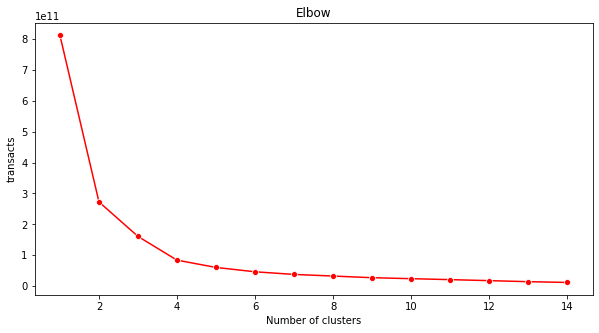

In [ ]:
import seaborn as sns


plt.figure(figsize=(10,5))
sns.lineplot(range(1,15), transacts, marker='o', color='red')
plt.title("Elbow")
plt.xlabel('Number of clusters')
plt.ylabel('transacts')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=4, init='k-means++', random_state=1)
y_kmeans=kmeans.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

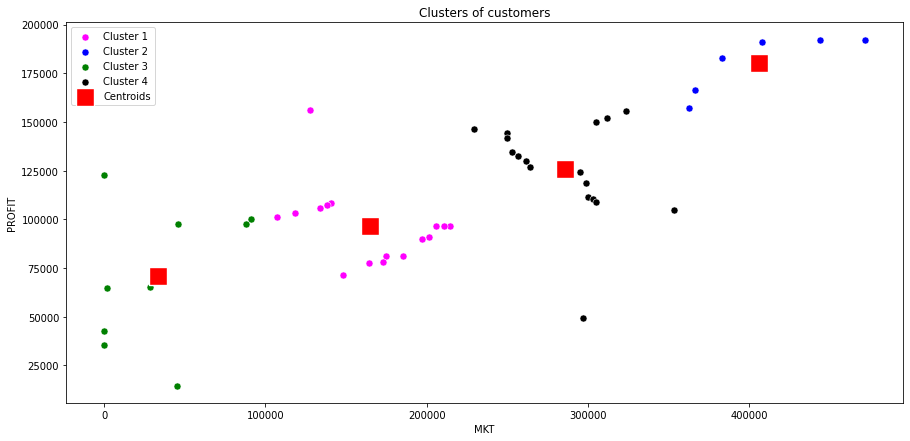

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'magenta', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'black', label = 'Cluster 4',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('MKT')
plt.ylabel('PROFIT')
plt.legend()
plt.show()

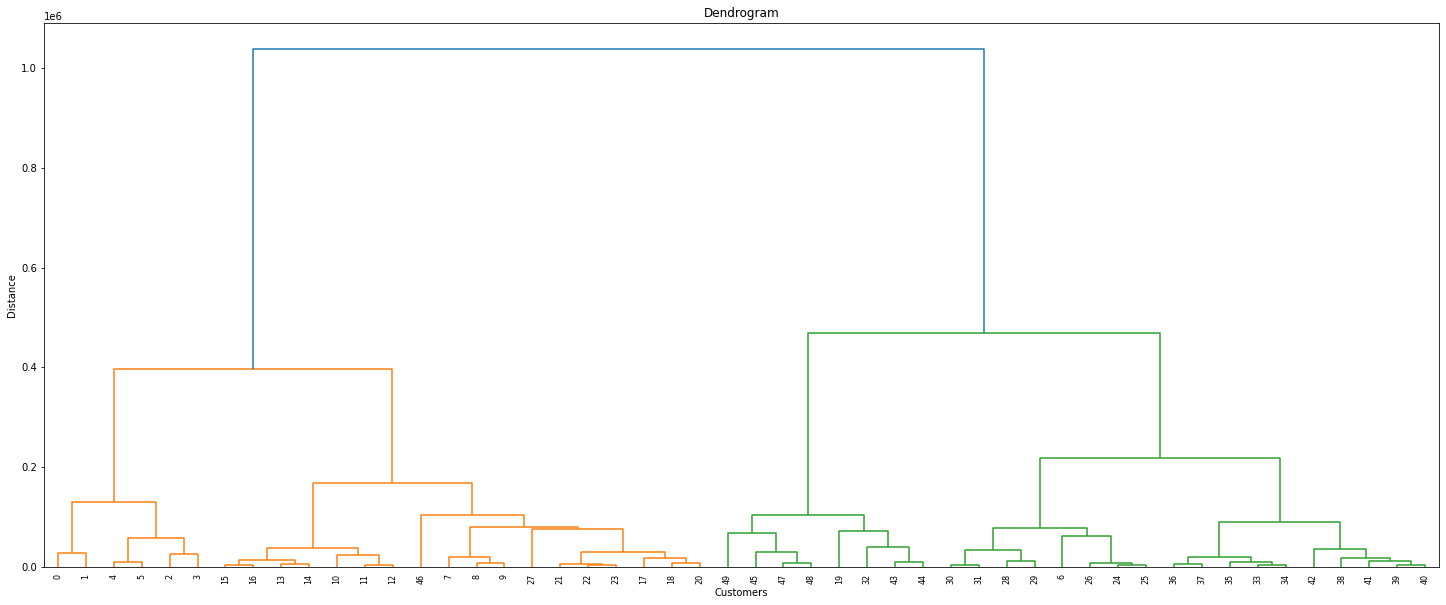

In [ ]:
import scipy.cluster.hierarchy as shc  
fig = plt.figure(figsize=(25,10))
dendro = shc.dendrogram(shc.linkage(X, method="ward"))  
plt.title("Dendrogram")  
plt.ylabel("Distance")  
plt.xlabel("Customers")  
plt.show() 